<a href="https://colab.research.google.com/github/pawank99235/Bike_sharing_demand_prediction/blob/main/Copy_of_The_Capstone_Project_2_Pavankumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name : Bike Sharing Demand Prediction**

Project Type : Regression

Done by : **Pavankumar Kashyap**



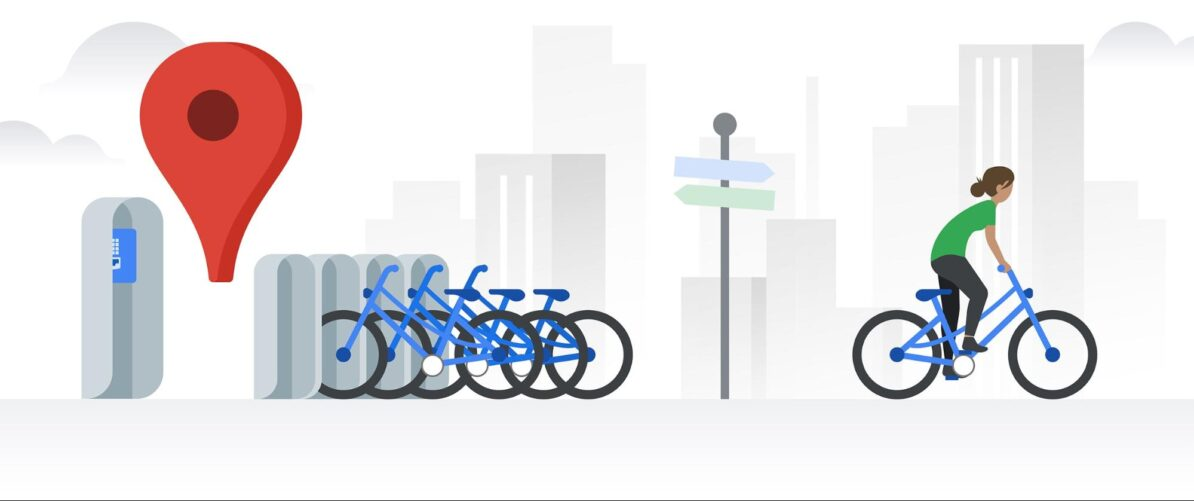

### **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

### **Data Description**

Date - year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature- Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - Whether a function day or not

### **Import Libraries**

To explore and visualize our dataset,we are importing python libraries

In [ ]:
#Import Libraries
import numpy as np
import numpy as math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [ ]:
import statsmodels.api as sm

In [ ]:
#Mounting the data csv

from google.colab import drive
from google.colab import files
source_file = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [ ]:
import pandas as pd
import io
dataset = pd.read_csv(io.BytesIO(source_file['SeoulBikeData.csv']), encoding= 'unicode_escape')

In [ ]:
print(dataset.sample(10))

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
7947  28/10/2018                299     3              6.2           59   
663   28/12/2017                303    15              0.4           57   
3511  26/04/2018               1124     7             10.7           68   
7973  29/10/2018                161     5              5.1           76   
2699  23/03/2018                584    11              7.1           50   
767   01/01/2018                154    23             -1.6           51   
5917  04/08/2018                703    13             33.6           54   
1271  22/01/2018                139    23             -4.2           79   
3213  13/04/2018               1311    21             16.4           24   
8335  13/11/2018               1066     7              4.4           72   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
7947               0.6              2000                       -1.2   
663                2.4          

In [ ]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
# First 5 observations of dataset
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Shape of dataset
dataset.shape

(8760, 14)

**In this dataset, We have 8760 observations and 14 columns**

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Description of dataset
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Use for to get unique value from each categorical columns
def categorical_unique_value(categorical_column, df) :
  for column in categorical_column:
    print('The values which are categorical', column, 'could take in :' , df[column].unique())

In [ ]:
#Possible values and important categorical values of dataset
categorical_columns_of_dataset = ['Seasons' , 'Holiday']
categorical_unique_value(categorical_columns_of_dataset , dataset)

The values which are categorical Seasons could take in : ['Winter' 'Spring' 'Summer' 'Autumn']
The values which are categorical Holiday could take in : ['No Holiday' 'Holiday']


In [ ]:
#Groupby function
def create_df_analysis(column):
  return dataset.groupby(column) ['Rented Bike Count'].sum().reset_index()

In [ ]:
#Seasons Column
Season_column = create_df_analysis('Seasons')
print(Season_column)

  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


By executing the following code, we would be able to determine the number of rented count for each season we have in the dataset.

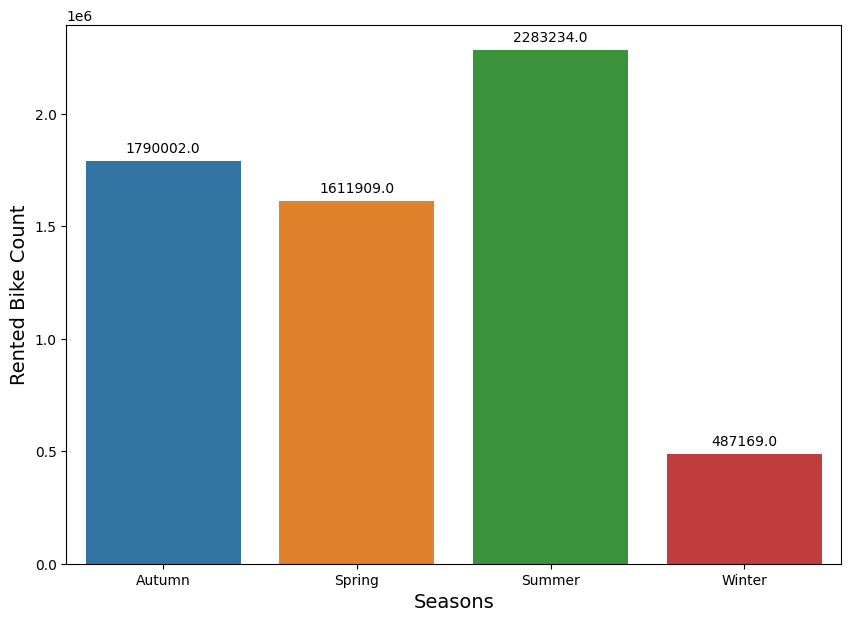

In [ ]:
#Visualisation for Season Column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=Season_column,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [ ]:
#Preparation for Pie Chart
seasons_list = list(Season_column['Seasons'])
rented_count_list = list(Season_column['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.05,0.05,0.05,0.05)

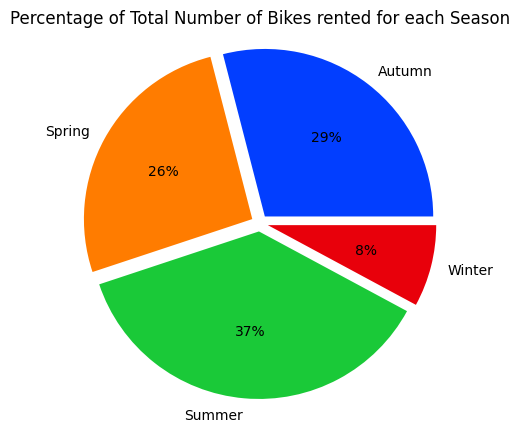

In [ ]:
#Pie chart for visualisation for Season Column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of Total Number of Bikes rented for each Season")
plt.axis("equal")
plt.show()

**From the above pie chart we can see that Summer Season has highest number of Rented Bike Count which is 37% and least in Winter which is 8%**

In [ ]:
# For Holiday Column
Holiday_Column = create_df_analysis('Holiday')
print(Holiday_Column)

      Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419


By executing the following code, we are able to visualize the rented bike count for holidays and for non-holidays

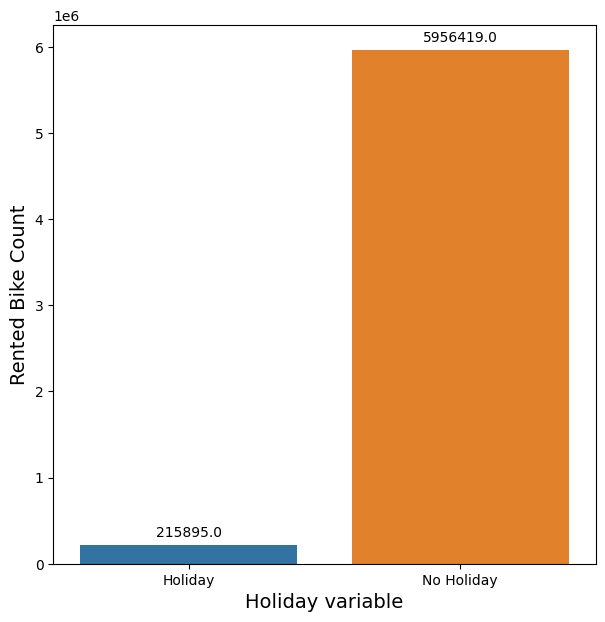

In [ ]:
#Visualisation for Holiday Column
plt.figure(figsize=(7,7))
splot = sns.barplot(data=Holiday_Column,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

**From the above graph we can say that Majority of bikes are rented on 'No Holiday'**

In [ ]:
#Visualisation for bikes rented on different temperatures
Bikes_rented_on_diff_T = create_df_analysis('Temperature(°C)')
print(Bikes_rented_on_diff_T)

     Temperature(°C)  Rented Bike Count
0              -17.8                322
1              -17.5                291
2              -17.4                 64
3              -16.9                 36
4              -16.5                 96
..               ...                ...
541             38.0               1184
542             38.7                475
543             39.0               1033
544             39.3                531
545             39.4                561

[546 rows x 2 columns]


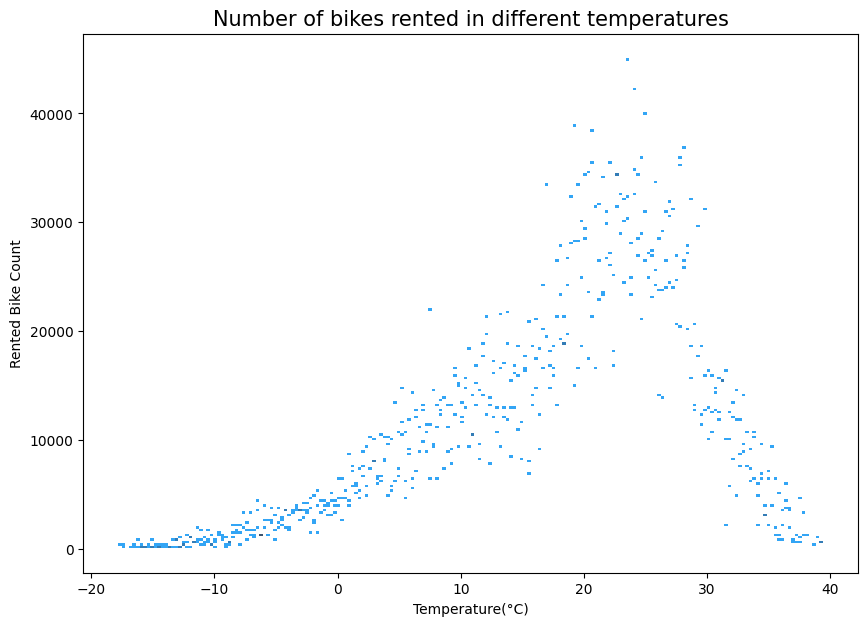

In [ ]:
#Visualisation for different temperature
plt.figure(figsize=(10,7))
sns.histplot(data=Bikes_rented_on_diff_T,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented in different temperatures',size=15)
plt.show()

In [ ]:
#Creating df to analyse no. of bikes rented in snowfall with different intensities
sf_bike = create_df_analysis('Snowfall (cm)')
print(sf_bike)

    Snowfall (cm)  Rented Bike Count
0             0.0            6090314
1             0.1                205
2             0.2               3643
3             0.3               8304
4             0.4               5981
5             0.5               4716
6             0.6               2775
7             0.7               5108
8             0.8               5632
9             0.9               4854
10            1.0               6357
11            1.1               1098
12            1.2                435
13            1.3               1092
14            1.4                429
15            1.5                168
16            1.6               3771
17            1.7                754
18            1.8               1551
19            1.9                703
20            2.0               4191
21            2.1                546
22            2.2               3813
23            2.3                897
24            2.4                792
25            2.5               1980
2

In [ ]:
#Top most
sf_bike.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


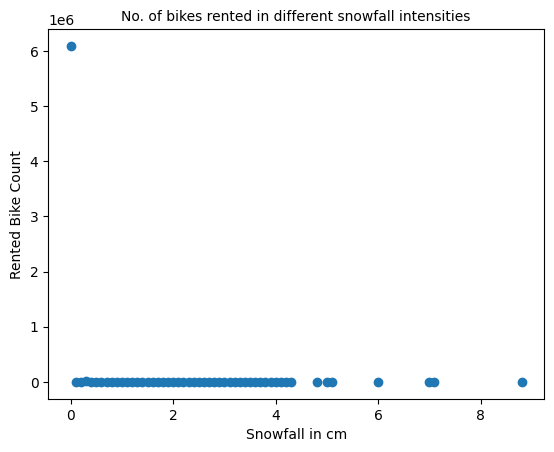

In [ ]:
#Visualisation for diff snowfall intensties
plt.scatter(data=sf_bike,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('No. of bikes rented in different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

In [ ]:
#Creating df to analyse no. of bikes rented in different intensities of rainfall
rf_bike = create_df_analysis('Rainfall(mm)')
print(rf_bike)

    Rainfall(mm)  Rented Bike Count
0            0.0            6086009
1            0.1              15179
2            0.2               3706
3            0.3               1401
4            0.4               2147
..           ...                ...
56          21.0                 19
57          21.5                596
58          24.0                 61
59          29.5                122
60          35.0                151

[61 rows x 2 columns]


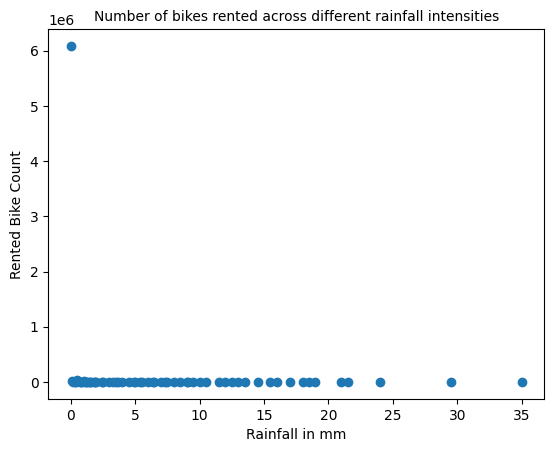

In [ ]:
#Visualisation for diff rainfall intensities
plt.scatter(data=rf_bike,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

**Fron the above we can say that most of the bikes rented when there is no snowfall and rainfall**

In [ ]:
#Creating df to analyse the no. of bikes rented in diff humidity intensities
humidity_rented_bikes = create_df_analysis('Humidity(%)')
humidity_rented_bikes

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


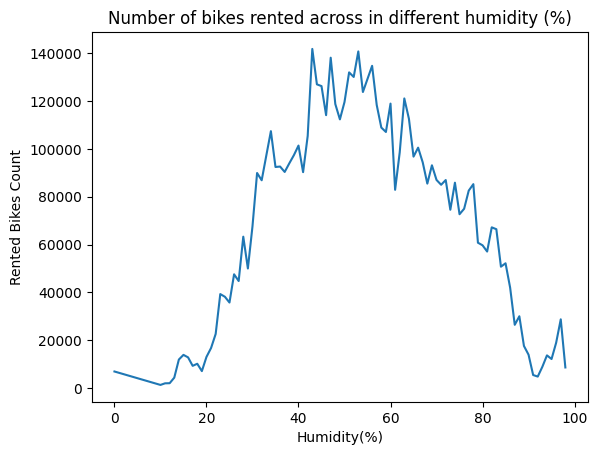

In [ ]:
#Visualisation for diff humidity intensities
plt.plot(humidity_rented_bikes['Humidity(%)'],humidity_rented_bikes['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bikes Count")
plt.title("Number of bikes rented across in different humidity (%)")
plt.show()

In [ ]:
#Creating df for no. of rented bikes in different hours of the day
rented_bikes_in_diff_hr = create_df_analysis('Hour')
print(rented_bikes_in_diff_hr)

    Hour  Rented Bike Count
0      0             197633
1      1             155557
2      2             110095
3      3              74216
4      4              48396
5      5              50765
6      6             104961
7      7             221192
8      8             370731
9      9             235784
10    10             192655
11    11             219311
12    12             255296
13    13             267635
14    14             276971
15    15             302653
16    16             339677
17    17             415556
18    18             548568
19    19             436229
20    20             390172
21    21             376479
22    22             336821
23    23             244961


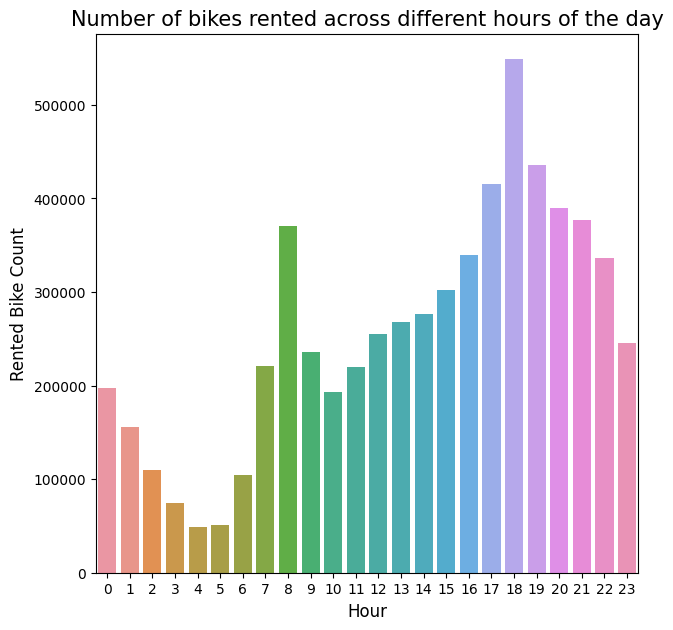

In [ ]:
#Visualisation for bikes rented in diff hours in a day
plt.figure(figsize=(7,7))
sns.barplot(data = rented_bikes_in_diff_hr,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

In [ ]:
#Creating df to analyse no. of bikes rented in diff visibility rates
vis_bikes_rented = create_df_analysis('Visibility (10m)')
print(vis_bikes_rented)

      Visibility (10m)  Rented Bike Count
0                   27                 83
1                   33                 33
2                   34                 24
3                   38                 98
4                   53                 65
...                ...                ...
1784              1996              19547
1785              1997              18324
1786              1998              19518
1787              1999              18466
1788              2000            1836690

[1789 rows x 2 columns]


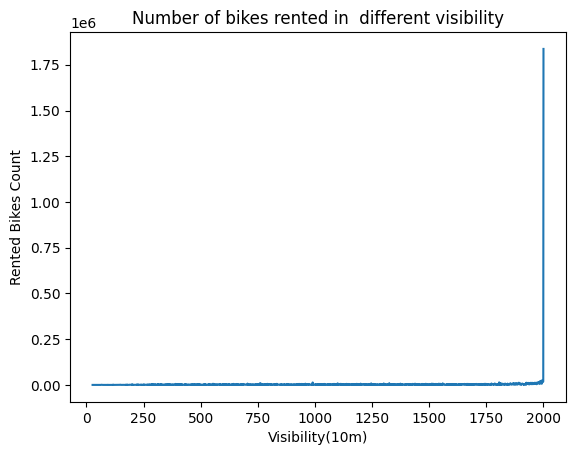

In [ ]:
#Visualisation for no. of bikes rented in diff visibility rates
plt.plot(vis_bikes_rented['Visibility (10m)'],vis_bikes_rented['Rented Bike Count'])
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bikes Count')
plt.title('Number of bikes rented in  different visibility')
plt.show()

Now, we plot graphs between numerical colums and rented bike count to determine and visualize the relationship between them.

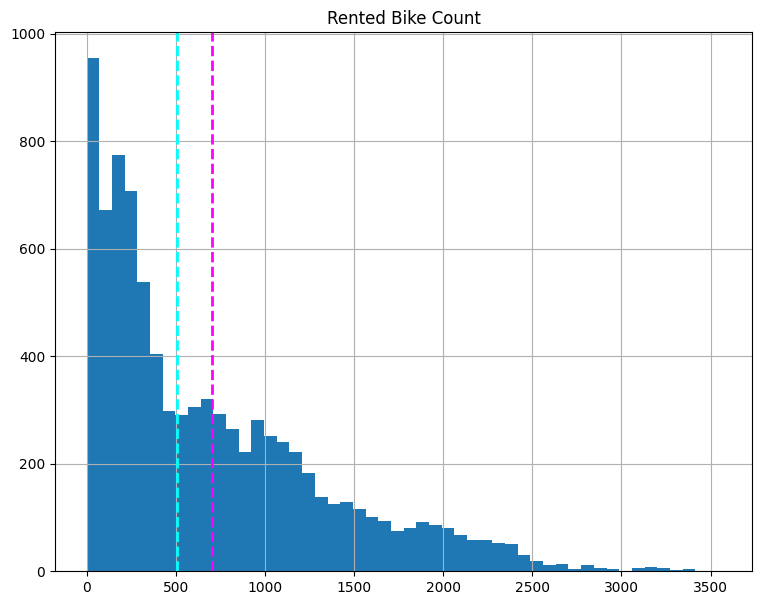

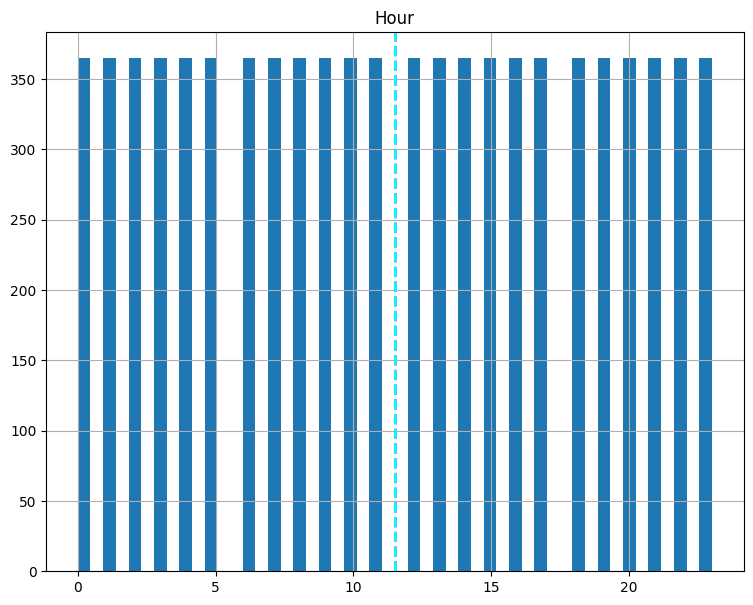

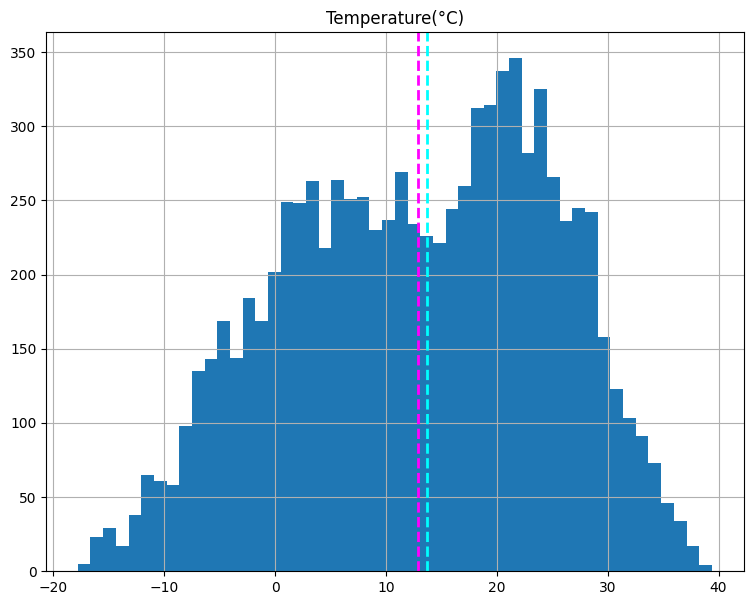

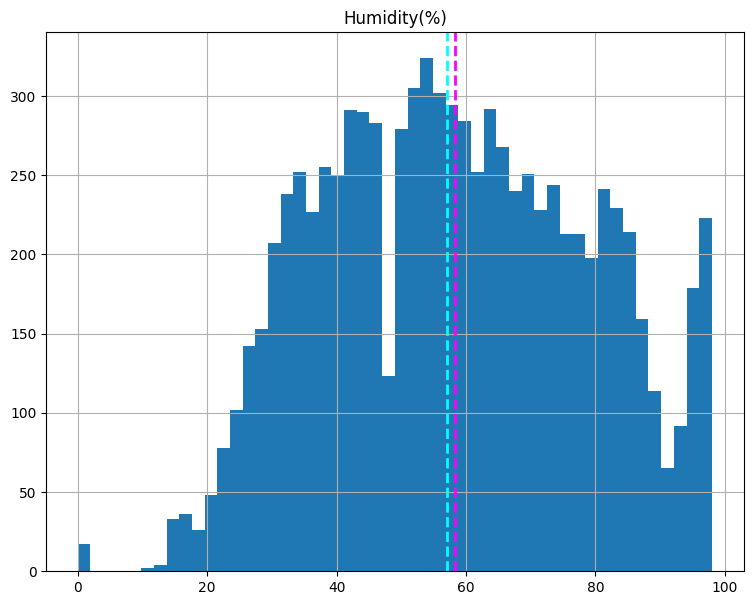

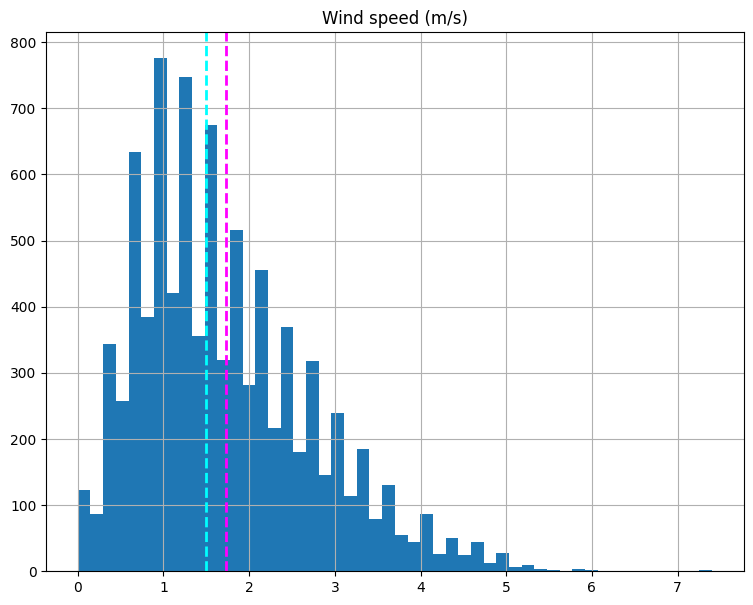

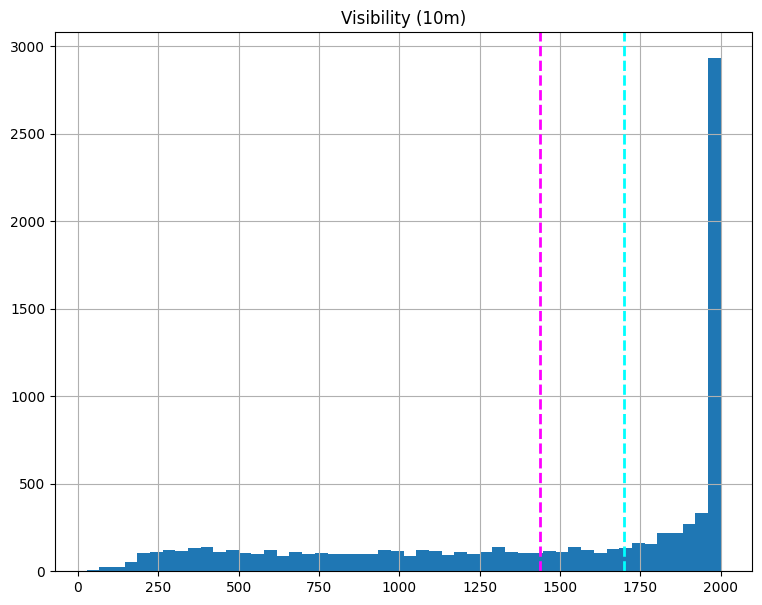

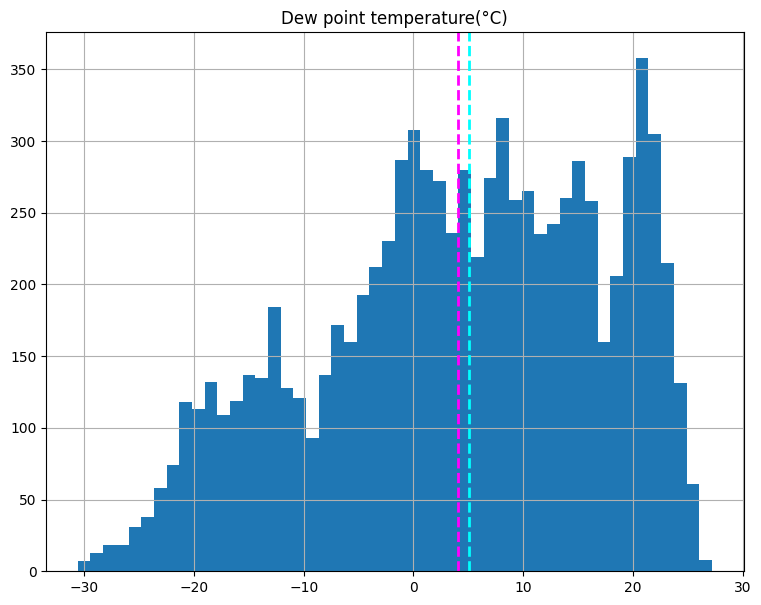

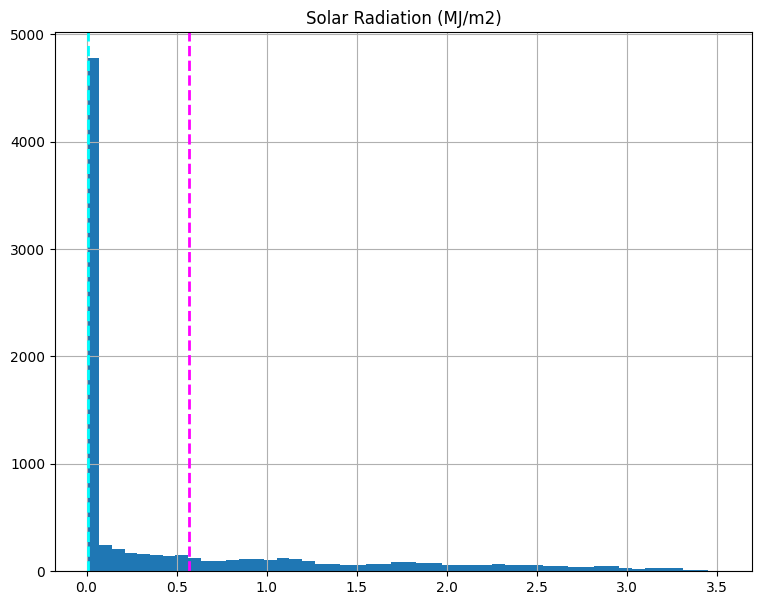

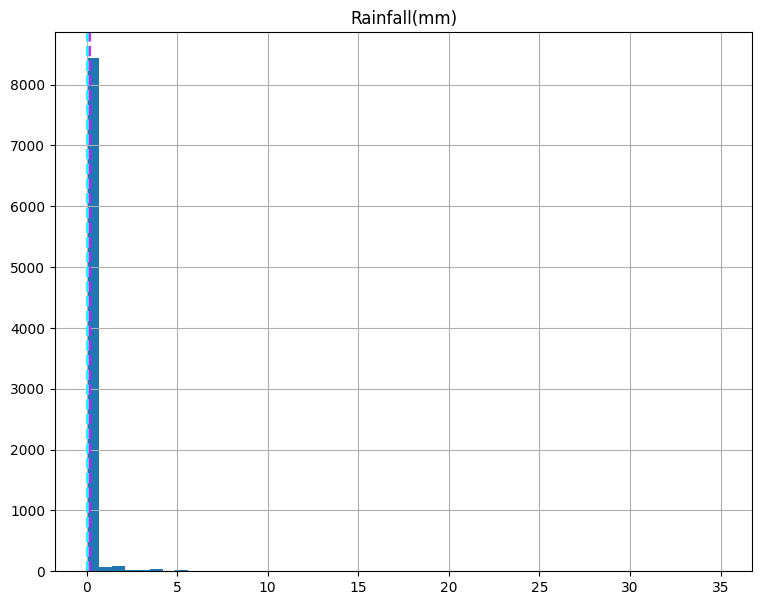

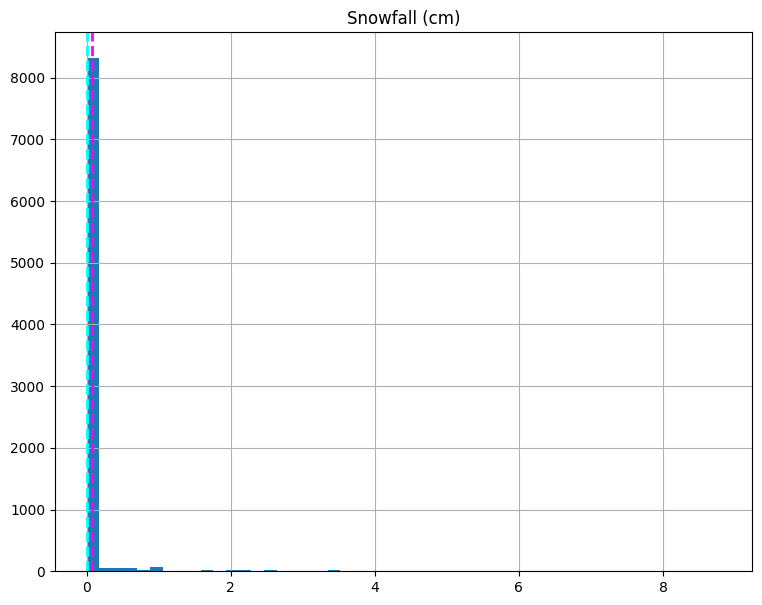

In [ ]:
numeric_columns = dataset.describe().columns
for i in numeric_columns:
  graph = plt.figure(figsize=(9,7))
  axis = graph.gca()
  feature = dataset[i]
  feature.hist(bins=50,ax=axis)
  axis.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  axis.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  axis.set_title(i)
plt.show()

We now plot histograms with respect to each numerical columns to visualize the correlation between the dependant variable i.e Rented Bike Count with respect to the numerical columns. Higher the correlation, higher is the impact of the columns in determination of the dependant variable.

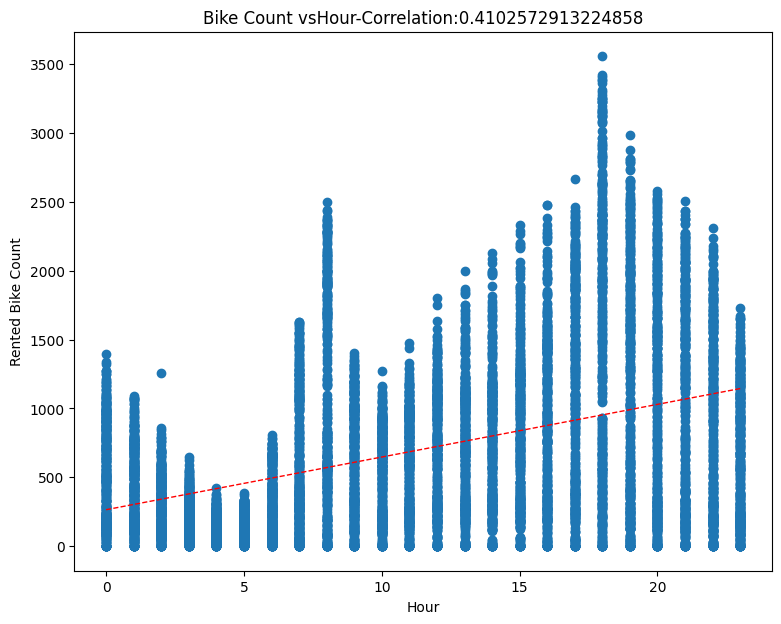

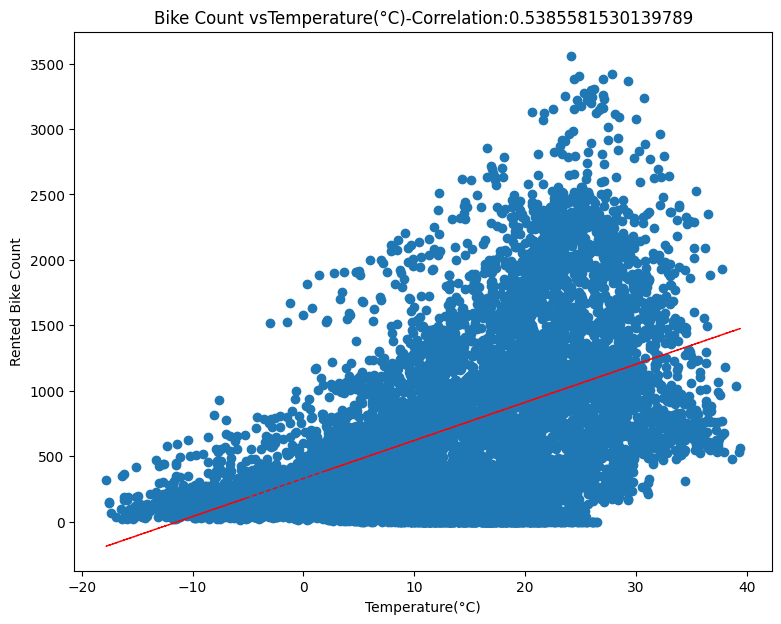

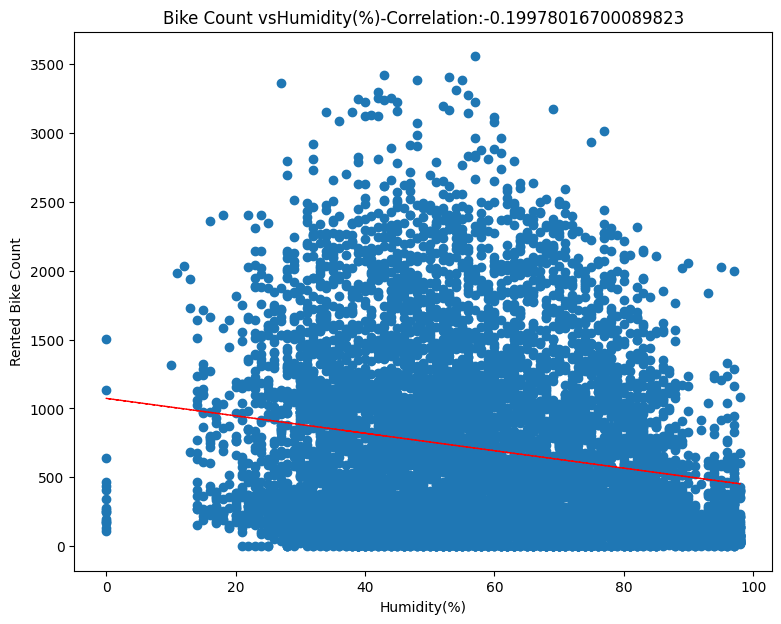

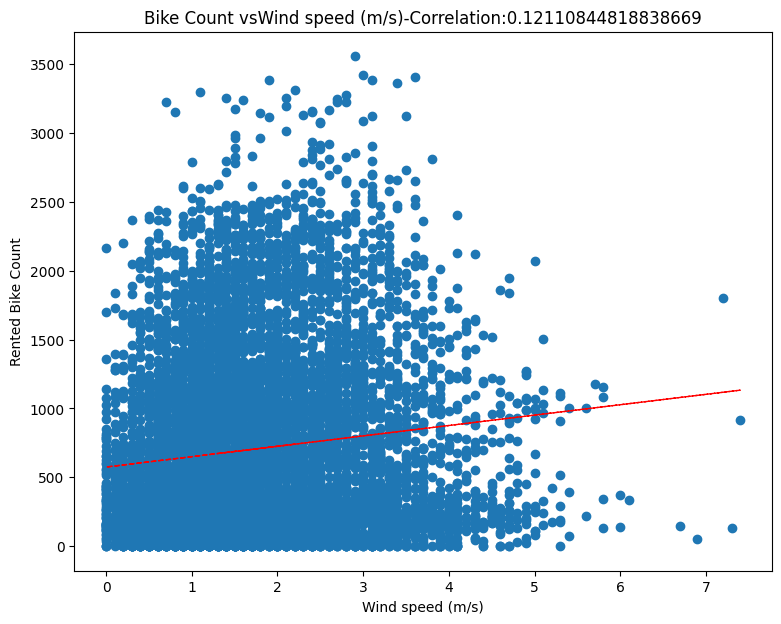

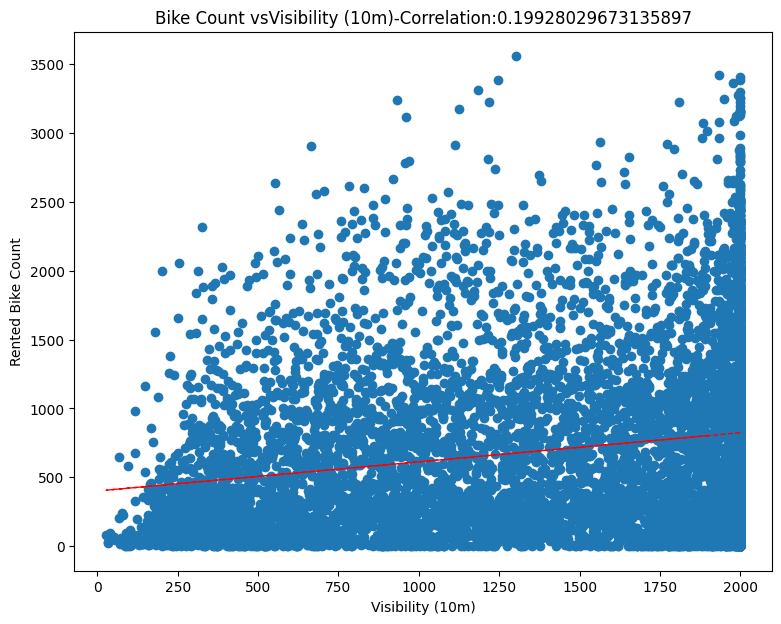

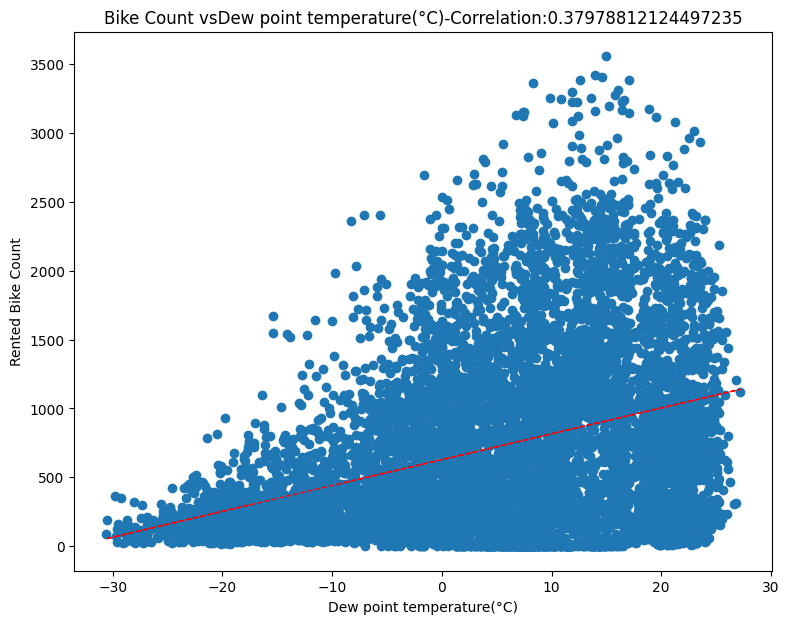

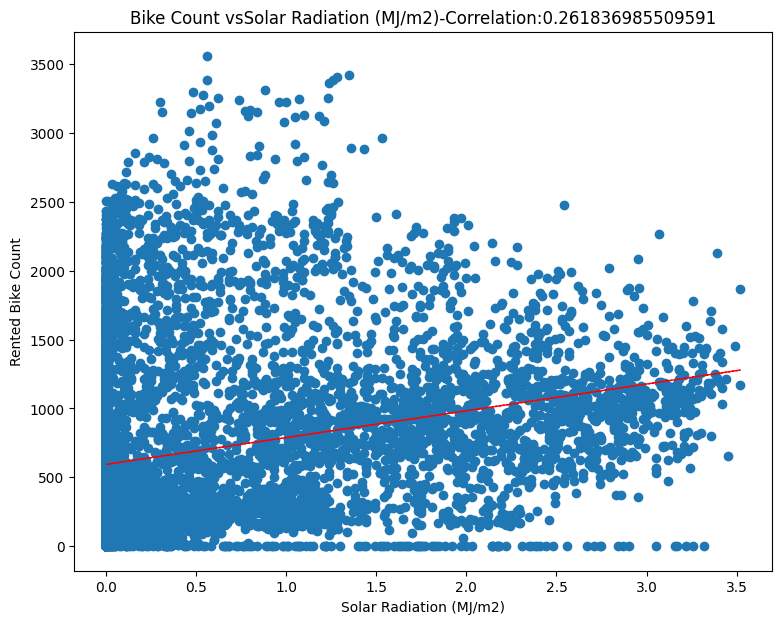

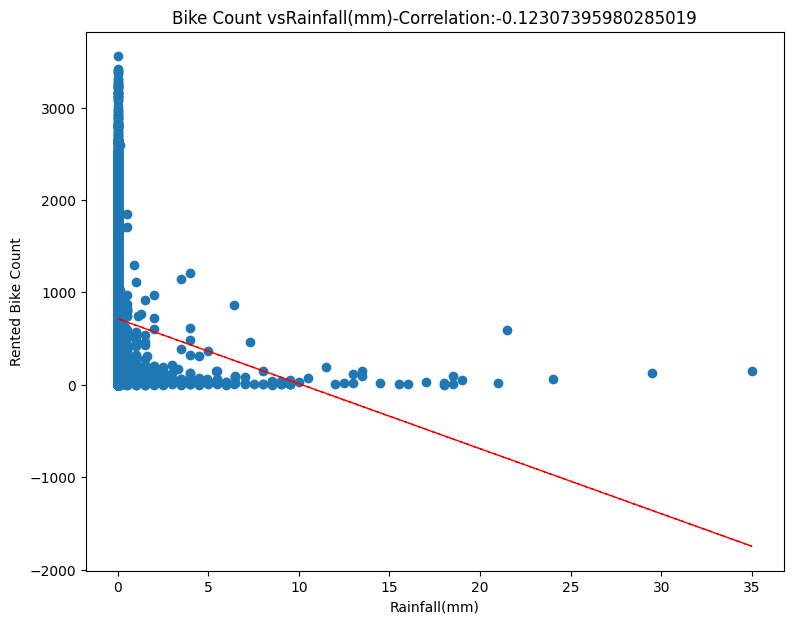

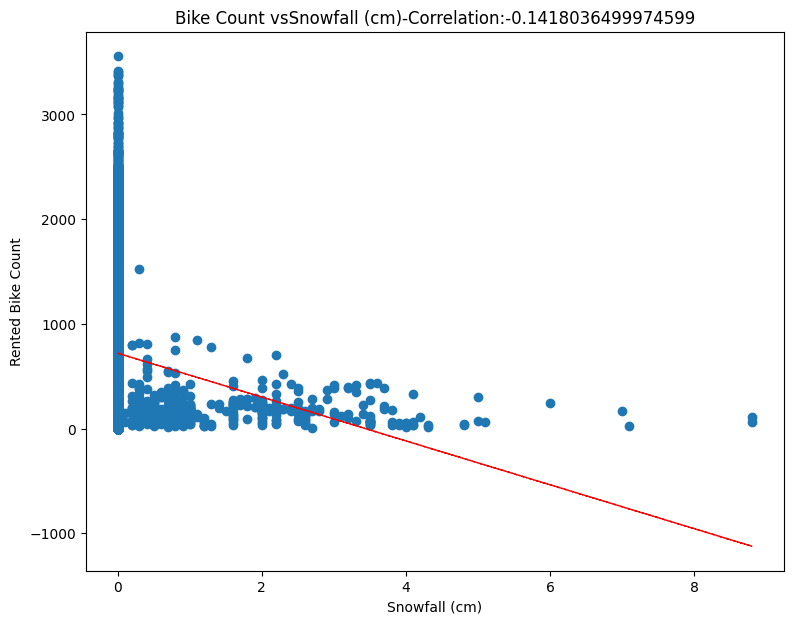

In [ ]:
for j in numeric_columns[1:]:
  figure = plt.figure(figsize=(9,7))
  axis = figure.gca()
  feature = dataset[j]
  label = dataset['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(j)
  plt.ylabel('Rented Bike Count')
  axis.set_title('Bike Count vs'+j+'-Correlation:'+str(correlation))
  z = np.polyfit(dataset[j], dataset['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(dataset[j])
  plt.plot(dataset[j], y_hat, "r--", lw=1)

plt.show()

# **Handling the all null values**

In [ ]:
#Lets check for null values in following dataset
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
dataset = dataset.dropna()

**In our dataset there's no null values are present**

# **Handling duplicate values**

In [ ]:
#Lets check for duplicated values in following dataset
dataset.duplicated().sum()

0

In [ ]:
#Let's check the unique values of our dataset
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


In [ ]:
#Importing date libraries
from datetime import datetime
import datetime as dt

In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Replacing some signs with new one to easy understanding
dataset['Date'] = dataset['Date'].str.replace('-', '/')
dataset['Date'] = dataset['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [ ]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

In [ ]:
#Dropping the some columns
dataset['weekdays_weekend']=dataset['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
dataset=dataset.drop(columns=['Date','day','year'],axis=1)

In [ ]:
#Let's see our new dataset
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#Values having of weekend and weekdays this thing will help in our train test dataset
dataset['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
#Replacing name with new one to better understanding and help us to write code very easily with any notation
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
#Importing some libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Our columns
cols=['Hour','month','weekdays_weekend']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [ ]:
#Summary of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
#Columns of our dataset
dataset.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
# Numeric values of our dataset
numeric_features= dataset.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


## **Outliers**

In [ ]:
#Let's Access a group of rows and columns by a boolean array
dataset.loc[dataset['Rainfall']>=4,'Rainfall']= 4
dataset.loc[dataset['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
dataset.loc[dataset['Snowfall']>2,'Snowfall']= 2
dataset.loc[dataset['Wind_speed']>=4,'Wind_speed']= 4

In [ ]:
#Now check our correlation of our dataset
dataset.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.131549,0.199280,0.379788,0.265658,-0.174224,-0.160917
Temperature,0.538558,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,-0.199780,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,0.131549,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,0.199280,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,0.379788,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,0.265658,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,-0.174224,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,-0.160917,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


# **OLS** **(Ordinary least squares)**

The use of applying this technique is properly estimate the unknown parameters while building the model. The OLS technique will minimize the sum of squared residuals between the actual and predicted values.

In [ ]:
import statsmodels.api as sm
X = dataset[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = dataset['Rented_Bike_Count']
dataset.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented_Bike_Count   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              2919.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:41:32   Log-Likelihood:                         -66848.
No. Observations:                8760   AIC:                                  1.337e+05
Df Residuals:                    8752   BIC:                                  1.338e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Temperature              65.4086      1.647     39.707      0.000      62.179      68.638
Humidity                 -0.8734      0.200     -4.359      0.000      -1.266      -0.481
Wind_speed               65.0933      5.952     10.937      0.000      53.426      76.760
Visibility                0.0103      0.010      0.994      0.320      -0.010       0.030
Dew_point_temperature   -32.0539      1.529    -20.958      0.000     -35.052     -29.056
Solar_Radiation        -127.2398      9.264    -13.735      0.000    -145.400    -109.080
Rainfall               -176.4489     11.048    -15.971      0.000    -198.106    -154.792
Snowfall                 45.4345     19.069      2.383      0.017       8.054      82.815
==============================================================================
Omnibus:                      969.850   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1615.846
Skew:                           0.776   Prob(JB):                         0.00
Kurtosis:                       4.421   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

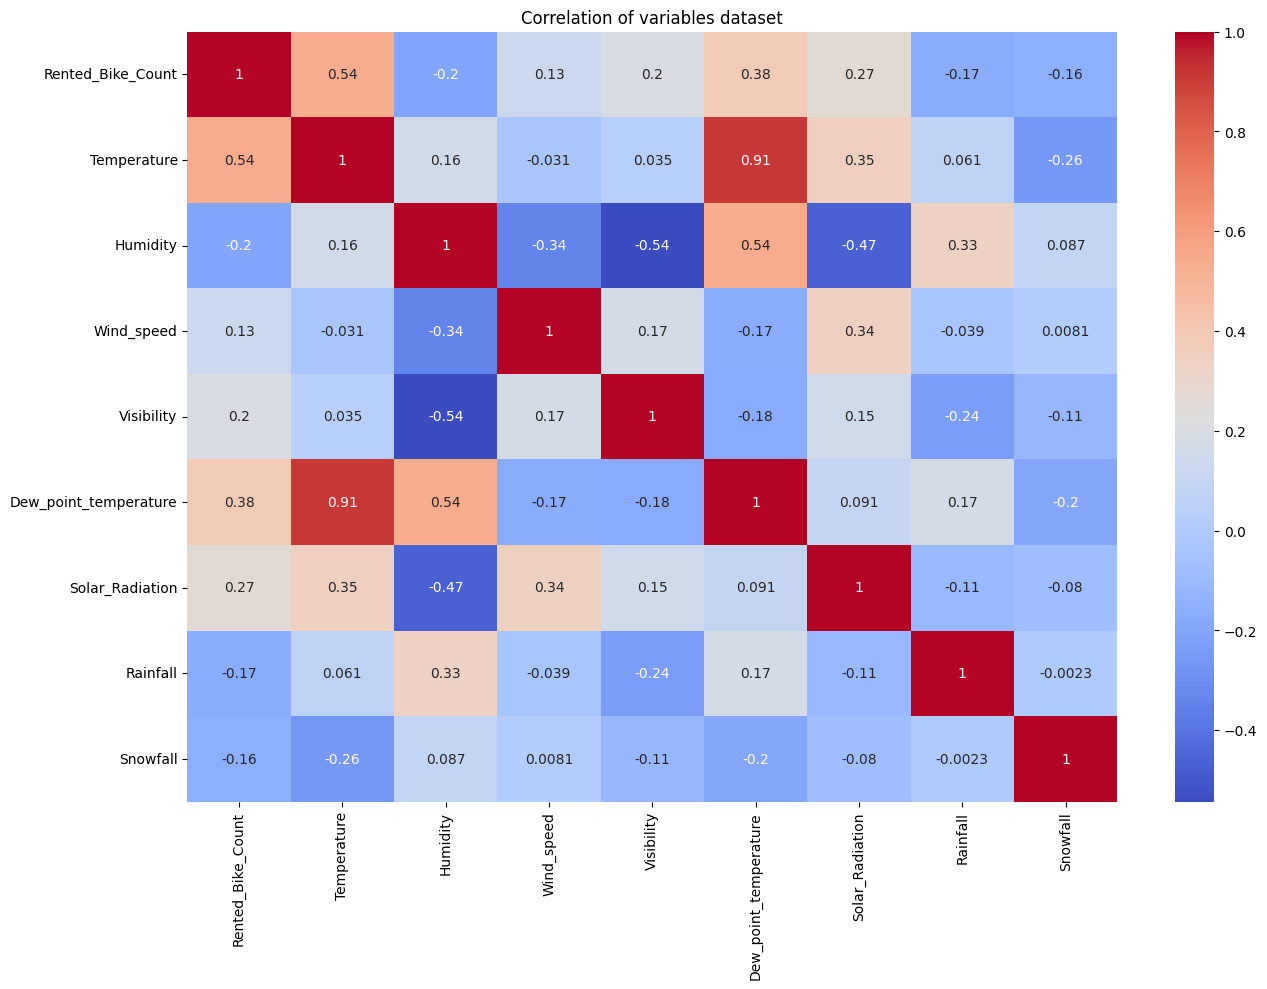

In [ ]:
#Correlatiion by plotting heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation of variables dataset')
plt.show()

In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


We are dropping the column 'Dew_point_temperature' and not the column 'Temperature' as the former shows higher correlation with other columns of the dataset when compared with the latter. Hence it is wiser to drop the column 'Dew_point_temperature'.

In [ ]:
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## **Target Feature ML**

The target variable is the feature of a dataset that you want to understand more clearly. It is the variable that the user would want to predict using the rest of the dataset.

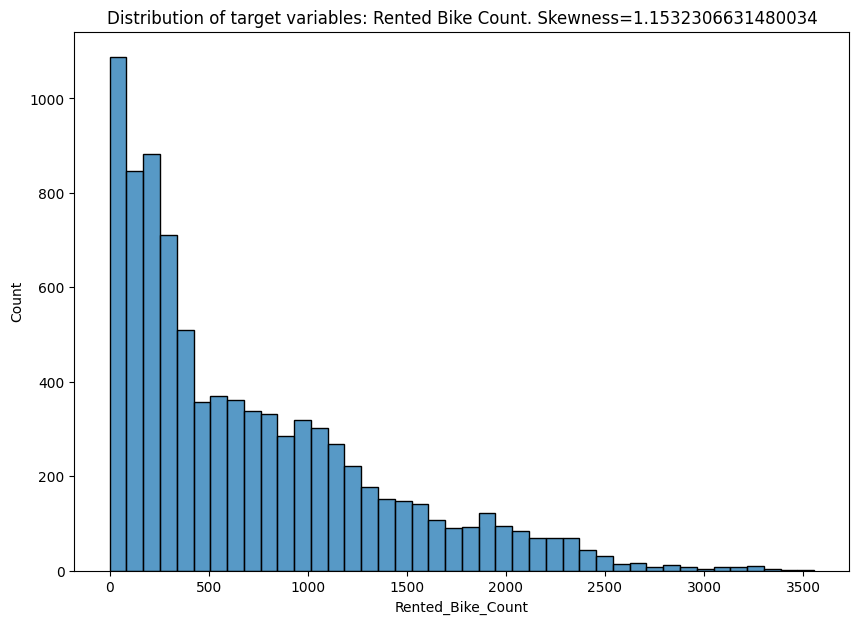

In [ ]:
#Let's check the distribution of target variable
plt.figure(figsize=(10,7))
plt.title("Distribution of target variables: Rented Bike Count. Skewness="+str(skew(dataset['Rented_Bike_Count'])))
sns.histplot(data=dataset,x='Rented_Bike_Count')
plt.show()

In [ ]:
#Now we'll apply the square root transformation in dependent variable also create the dataframe with values of Y
Y = np.sqrt(Y)
visualisation_of_Y = Y.reset_index()

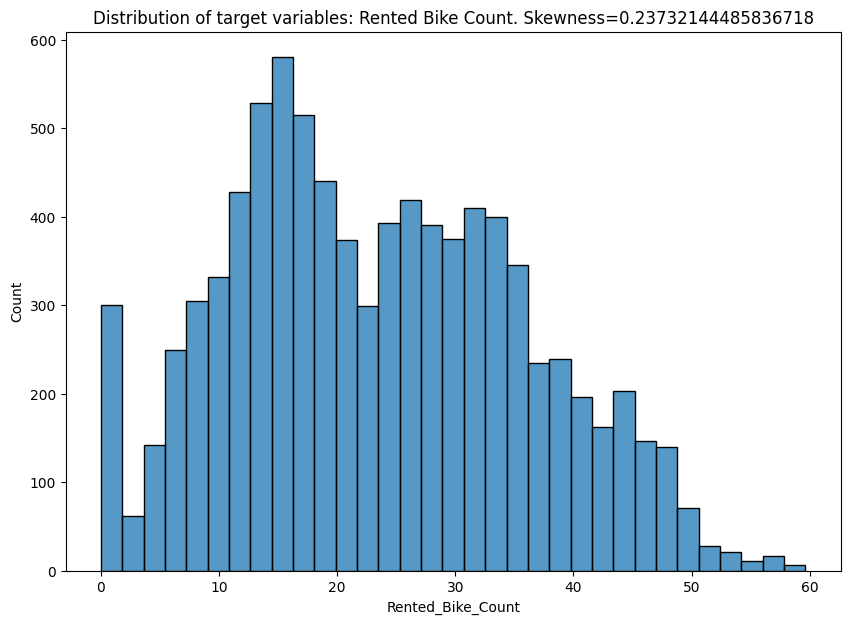

In [ ]:
#Now plotting the graph
plt.figure(figsize=(10,7))
plt.title("Distribution of target variables: Rented Bike Count. Skewness="+str(skew(visualisation_of_Y['Rented_Bike_Count'])))
sns.histplot(data=visualisation_of_Y ,x='Rented_Bike_Count')
plt.show()

The **Variance Inflation Factor(VIF)** is defined as a measure of degree of multicollinearity of one regressor when compared with other regressors. Higher the value of VIF, the higher is the multicollinearity.

In [ ]:
#Let's calculate the VIF
def calc_for_vf(X):
   vif = pd.DataFrame()
   vif["Columns"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
calc_for_vf(dataset[[i for i in dataset.describe().columns]])

,Columns,VIF
0,Rented_Bike_Count,3.492581
1,Temperature,4.504964
2,Humidity,5.106059
3,Wind_speed,4.511385
4,Visibility,4.823118
5,Solar_Radiation,2.314779
6,Rainfall,1.203189
7,Snowfall,1.154280


## **One hot encoding**

As the categorical columns play a pivotal role in building the model, it is of prime importance to convert this categorical information into a format that might serve the model enough to better predict the dependant variable.

In [ ]:
categorical_features=list(dataset.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
dataset_copy = dataset

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    dataset_copy = one_hot_encoding(dataset_copy, col)
dataset_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


*In our dataset there's no duplicated values are present*

## ***Training and Testing the model***

Why it is required ?

Evaluation of model performance: Splitting the data into training and testing sets allows us to measure how well our model performs on unseen data. By training the model on the training set and evaluating it on the testing set, we can get an estimate of its generalization ability. This helps to prevent overfitting, where the model performs very well on the training data but fails to generalize to new data.

Assessment of model bias and variance: Splitting the data helps to assess the bias-variance trade-off. If we observe a significant difference between the performance on the training set and the testing set, it indicates a high variance problem. On the other hand, if the model performs poorly on both sets, it suggests a high bias problem. This understanding can guide us in selecting appropriate model strategies, such as tuning hyperparameters or changing the model architecture.

Validation of model selection: By using separate training and testing datasets, we can compare the performance of different models. This helps in model selection and choosing the best algorithm or parameters based on their performance on the testing set. The testing set acts as an unbiased evaluation of the models' performance and allows us to choose the one that generalizes well.

In summary, creating training and testing datasets is crucial to evaluate and validate the performance of our models, as well as to avoid overfitting and facilitate model selection.

In [ ]:
X = dataset_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset_copy['Rented_Bike_Count'])

In [ ]:
#Top most values
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Top most values
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Let's check the shape of our train test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
#Summary of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [ ]:
#All columns of our dataset
dataset_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#Let's check our score of model
reg.score(X_train, y_train)

0.791252853377143

The above value depicts the efficiency of the model to predict the dependant variable.

In [ ]:
reg.coef_

array([ 4.68899686e-01, -1.02733686e-01,  1.83389932e-02,  6.99377347e-04,
        9.18648101e-01, -5.11433440e+00, -2.17361057e-01, -2.18196972e+00,
       -5.03358899e+00, -7.07227656e+00, -9.68767884e+00, -9.28180883e+00,
       -4.17525131e+00,  1.98924368e+00,  7.41923561e+00,  1.62031037e+00,
       -3.02792590e+00, -3.03027527e+00, -1.90798462e+00, -2.28030752e+00,
       -2.40532863e+00, -1.09497887e+00,  7.19611360e-01,  4.50143285e+00,
        1.07240063e+01,  7.21392625e+00,  6.19079708e+00,  6.27641939e+00,
        5.13030344e+00,  1.46615648e+00, -9.03397290e+07,  4.78702031e+07,
       -7.87118106e+07,  3.41060308e+00,  2.83867043e+01, -6.19500042e-01,
        1.16279214e+07,  1.16279231e+07,  1.16279256e+07, -1.26582005e+08,
       -1.26582011e+08, -1.26582013e+08, -7.87118041e+07, -7.87118016e+07,
       -7.87118030e+07,  2.04432372e+00, -1.36518278e+00])

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.145114805768415
RMSE : 5.669666198795871
MAE : 4.30109837175655
R2 : 0.791252853377143
Adjusted R2 : 0.7866725004867255


From the result generated above we can conclude that the model has lower mean squared error as well as higher R square value which depicts a greater success rate in predicting the dependant variable.

## **Lasso Regression**

In [ ]:
#Lasso regression model
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_gridSC = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_gridSC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regre_model=Lasso(alpha=0.8).fit(X_train,y_train)

In [ ]:
lasso_regre_model.score(X_train, y_train)

0.40854276467657336

In [ ]:
pred_value_Y_test = lasso_regre_model.predict(X_test)

In [ ]:
y_pred_train_lasso=lasso_regre_model.predict(X_train)
y_pred_test_lasso=lasso_regre_model.predict(X_test)

In [ ]:
def evaluation_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")

  #Mean squared error for test dataset
  MSE  = mean_squared_error(y_train, y_pred_train_lasso)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

 #r2 score for prediction on test dataset
  r2_test = r2_score(y_train, y_pred_train_lasso)
  print("R2 :" ,r2_test)

#adjusted r2 score for test dataset
  a_r2_test = 1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 :",a_r2_test)

In [ ]:
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("Comparison of actual values and  the prediction values obtained by "+model)
   plt.plot(np.array((y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

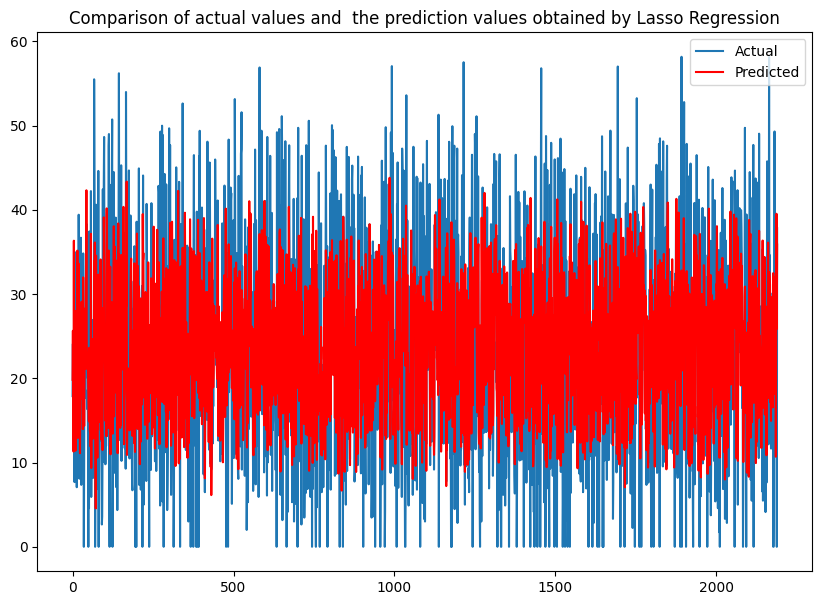

In [ ]:
plot_comparison(pred_value_Y_test ,'Lasso Regression')

In [ ]:
evaluation_metrics(pred_value_Y_test ,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 91.07890114792184
RMSE : 9.543526661979932
R2 : 0.40854276467657336
Adjusted R2 : 0.3955649448538838


From the above result we conclude that Lasso Regression modelling is not fit for the dataset we are using.

## **Ridge Regression**

In [ ]:
#Ridge Regression Model
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_gridSC = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_gridSC.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Now we're printing the best value for ridge regression
print(f'The best value for alpha in ridge regression by using GridSearchCV is found to be {ridge_model_gridSC.best_params_}')
print(f'\n By using {ridge_model_gridSC.best_params_} as the value for alpha gives us a negative mean squared error of: {ridge_model_gridSC.best_score_}')

The best value for alpha in ridge regression by using GridSearchCV is found to be {'alpha': 1}

 By using {'alpha': 1} as the value for alpha gives us a negative mean squared error of: -32.708671847320716


In [ ]:
ridge_regre_model = Ridge(alpha=35).fit(X_train,y_train)

In [ ]:
ridge_regre_model.score(X_train, y_train)

0.7845159552866268

In [ ]:
pred_value_Y_test_ridge = ridge_regre_model.predict(X_test)

In [ ]:
y_pred_train_lasso=ridge_regre_model.predict(X_train)
y_pred_test_lasso=ridge_regre_model.predict(X_test)

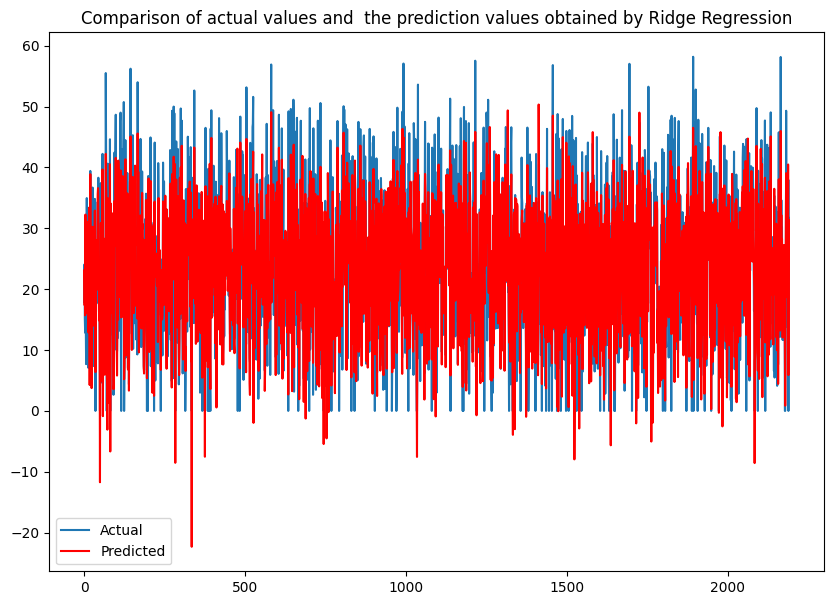

In [ ]:
plot_comparison(pred_value_Y_test_ridge,'Ridge Regression')

In [ ]:
evaluation_metrics(pred_value_Y_test_ridge ,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 33.18253431572541
RMSE : 5.760428310093392
R2 : 0.7845159552866268
Adjusted R2 : 0.7797877806360533


The above conclusion states that Ridge regression model would also fetch better results same as Linear regression model.

## **Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.641910450609957

In [ ]:
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
print(y_pred_train_en)
print(y_pred_test_en)

[15.68077567 31.24309653 17.3320067  ... 32.50762556 22.63580595
 19.21383635]
[19.01670529 24.63235562 18.23867345 ... 39.95161758 18.30435149
 32.95386409]


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.14245278133264
RMSE : 7.425796440876402
MAE : 5.653172410366239
R2 : 0.641910450609957
Adjusted R2 : 0.6340532102638636


From the above conclusion we can say that Elastic Net Regression model can predict the dependant variable with good accuracy but it is not wise to use this as we have already got better results while using other models.

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9896430683032555
MSE : 1.594870942254595
RMSE : 1.26288199854721
MAE : 0.8054870357480913
R2 : 0.9896430683032555
Adjusted R2 : 0.9894158153668657


## **From the above conclusion we can state that the Random Forest Regression model fits best with current dataset as it has the highest success rate while predicting the dependant variable.**

## **Conclusion:**

**EDA Insights:**


*   Most of the bikes are rented in Summer season followed by Autumn season. In winter season, least number of bikes are rented.

*   Majority of bikes are rented when the temperature ranges between 15 ℃ and 30 ℃.

*   It was observed that lower rainfall and lower snowfall led to higher bikes being rented.

*   Rental bikes were preferred in non-holidays.

*   Majority of bikes are rented when the humidity ranges in the range of 30 to 70.

*   Most of the bikes are rented around 8 AM and between 5 PM and 8 PM.



**Model Insights:**



*   Of all the models implemented, Random Forest Regression model provided the best results and hence has predicted the dependant variable with utmost efficiency.

*   The highly correlated columns of the data set were handled diligently to withdraw any correlation with other columns present to avoid any negligence while building the model.

*   The date column was formatted and used as a categorical variable in order to group the data on the basis of observation month for better coherence.

*  The OLS model was implemented to reduce the sum of square error which might have had a negetive effect in the productivity of the prediction algorithm.

*   Temperature, Rainfall, Solar Radiation and Humidity are major driving factors for bike rent prediction of these the Temperature values is the major factor to determing the count of rental bikes.
*   With the ever evolving field of Machine Learning, there is a greater chance of evolution of training models in days to come. For the very same reason it is observed that certain training models fail to produce optimum results when compared with other models. Hence it is of paramount importance to keep up with newer algorithms and methodologies to make our understanding better in this field.
















## **Hurrah! We have successfully completed our Machine Learning Capstone Project !!!**